In [6]:
"""
This script processes MOF (Metal-Organic Framework) data for hydrogen storage analysis:
1. Combines and processes selected MOF data from multiple iteration files
2. Ensures each combined file has at least 75 data points by supplementing from a source file
3. Implements a chat interface using Baidu API to get MOF design recommendations based on performance criteria

The script handles data preprocessing for machine learning and expert system analysis of MOF hydrogen storage capabilities.
"""

import requests
import json
import pandas as pd
import os

# Define output folder and original CSV file paths
output_folder = './selected_mofs/split' ## Derived from clustering in the performance prediction code
input_csv = './training/13515.csv'

# Read original CSV file
original_df = pd.read_csv(input_csv)

# Initialize DataFrame for selected data
selected_data = pd.DataFrame()

# Loop through iteration files and combine data
a = 1
b = 2
while b < 300:
    selected_data = pd.DataFrame()
    for i in range(a, b):
        iteration_csv = os.path.join(output_folder, f'selected_iteration_{i}.csv') ## Derived from clustering in the performance prediction code
        if os.path.exists(iteration_csv):
            selected_indices_df = pd.read_csv(iteration_csv)
            selected_rows = original_df[original_df.index.isin(selected_indices_df['index'])]
            selected_data = pd.concat([selected_data, selected_rows], ignore_index=True)
    selected_data.to_csv(os.path.join(output_folder, f'combined_selected_data_{a}_to_{b}.csv'), index=False) ## Derived from clustering in the performance prediction code
    a += 1
    b += 1

# Define paths for data supplementation
supplement_source_file = os.path.join(output_folder, 'combined_selected_data_180_to_299.csv') ## Derived from clustering in the performance prediction code

# Read supplementary source file
supplement_df = pd.read_csv(supplement_source_file)

# Ensure minimum data points in each file
for i in range(1, 181):
    target_file_path = os.path.join(output_folder, f'combined_selected_data_{i}_to_{i+1}.csv') 
    if os.path.exists(target_file_path):
        target_df = pd.read_csv(target_file_path)

        if len(target_df) < 75:
            needed = 75 - len(target_df)
            
            if len(supplement_df) >= needed:
                supplement_data = supplement_df.head(needed)
                supplement_df = supplement_df.iloc[needed:]
                target_df = pd.concat([target_df, supplement_data], ignore_index=True)
                
                target_df.to_csv(target_file_path, index=False)
                supplement_df.to_csv(supplement_source_file, index=False)
            else:
                print(f"Warning: Insufficient data in supplement file for {target_file_path}")

# Baidu API credentials
API_KEY = "3pOGixxxxxxxx"
SECRET_KEY = "x45v7xxxxxxxx"

def main():
    url = "https://aip.baidubce.com/rpc/2.0/ai_custom/v1/wenxinworkshop/chat/plaxmyep_sb?access_token=" + get_access_token()
    
    payload = json.dumps({
         "messages": [
            {
                "role": "user",
                "content": "You are a materials scientist. Your task is to design MOF materials to meet specific hydrogen storage performance (UG) under working conditions from 77K 100bar to 160K 5bar. The storage performance UG is divided into five categories: Bad (0-9.775), Poor (9.776-14.63), Average (14.63-19.69), Good (19.69-25.91), and Excellent (25.91-60) in wt%. MOFs consist of metal nodes, organic nodes, and organic edges arranged in specific topological patterns. I will provide you with two sets of information: first, details about metal nodes, organic nodes, and organic edges; second, a list showing performance evaluations of MOFs made from these components. Please design easily synthesizable MOFs that achieve Excellent performance based on this data and hydrogen storage factors. Select three items each from metal nodes, organic nodes, and organic edges that meet the requirements, presented in list format. Please respond with 'OK' for now and wait for both lists before making recommendations."
            }
        ]
    })
    headers = {
        'Content-Type': 'application/json'
    }
    
    response = requests.request("POST", url, headers=headers, data=payload)
    print(response.text)

def get_access_token():
    """
    Generate authentication signature (Access Token) using AK and SK
    :return: access_token, or None (if error)
    """
    url = "https://aip.baidubce.com/oauth/2.0/token"
    params = {"grant_type": "client_credentials", "client_id": API_KEY, "client_secret": SECRET_KEY}
    return str(requests.post(url, params=params).json().get("access_token"))

if __name__ == '__main__':
    main()

{"id":"as-jetc3qi7en","object":"chat.completion","created":1713877377,"result":"Metal nodes: Zn, Cd, Cu, Ni, Co, Fe, Mn, Mo\\nOrganic nodes: 1,4-benzenedicarboxylic acid (H2BDC), 1,3,5-benzenetricarboxylic acid (H3BTC), 1,2,4,5-benzenetetracarboxylic acid (H4BTC), 1,3,5-tris(4-carboxyphenyl)benzene (H3TCPB), 1,3,5-tris(4-carboxyphenyl)benzene (H3TCPB)\\nOrganic edges: 1,4-benzenedicarboxylate (BDC), 1,3,5-benzenetricarboxylate (BTC), 1,2,4,5-benzenetetracarboxylate (BTC), 1,3,5-tris(4-carboxyphenyl)benzene (TCPB), 1,3,5-tris(4-carboxyphenyl)benzene (TCPB)\\nFirst round performance evaluation of MOFs: \\n1. Zn-H2BDC-BDC: Excellent\\n2. Cd-H2BDC-BDC: Excellent\\n3. Cu-H2BDC-BDC: Excellent\\n4. Ni-H2BDC-BDC: Excellent\\n5. Co-H2BDC-BDC: Excellent\\n6. Fe-H2BDC-BDC: Excellent\\n7. Mn-H2BDC-BDC: Excellent\\n8. Mo-H2BDC-BDC: Excellent\\nSecond round performance evaluation of MOFs: \\n1. Zn-H3BTC-BTC: Excellent\\n2. Cd-H3BTC-BTC: Excellent\\n3. Cu-H3BTC-BTC: Excellent\\n4. Ni-H3BTC-BTC: Excel

In [39]:
# This script reads MOF (Metal-Organic Framework) data from a CSV file and processes it
# for hydrogen storage performance analysis. It extracts key structural components 
# (metal nodes, organic nodes, edges) and their storage capacity (UG) values.

import pandas as pd

# Define CSV file path
file_path_csv = './data/selected_mofs/combined_selected_data_1_to_2.csv'

# Read specified columns from CSV
data = pd.read_csv(file_path_csv, usecols=['node 1','node 2','edge','UG'])

# Convert data to string format with headers
list_like_string = data.to_string(index=False, header=True)

# Print results 
print(list_like_string)


      node 1       node 2 edge     UG
 sym_16_mc_6          NaN L_29  9.564
  sym_8_mc_7          NaN L_40 10.217
  sym_3_mc_0   sym_4_on_8  L_5 18.281
  sym_3_on_2   sym_4_mc_1  L_3 19.664
 sym_5_on_10   sym_8_mc_7 L_47 23.878
 sym_5_on_13   sym_8_mc_9 L_29 18.658
  sym_5_on_9   sym_8_mc_8 L_22 13.561
  sym_3_mc_0  sym_4_on_14 L_39 30.189
  sym_3_on_2   sym_4_mc_1 L_21 30.216
  sym_3_on_2   sym_4_mc_1 L_28 28.008
  sym_4_mc_1  sym_16_mc_6 L_26 16.122
  sym_4_on_7   sym_4_mc_1 L_13 15.617
  sym_4_on_8   sym_4_mc_1  L_8 16.535
  sym_4_mc_1   sym_8_mc_9  L_4  8.604
  sym_4_on_6   sym_8_mc_7 L_20  9.501
  sym_4_on_7   sym_8_mc_9 L_45 14.715
 sym_5_on_13 sym_12_mc_11 L_19 12.168
  sym_5_on_9 sym_12_mc_11  L_7  2.746
  sym_4_mc_1   sym_9_mc_5  NaN  4.801
  sym_4_mc_1  sym_4_on_14  L_1  9.668
  sym_3_on_0   sym_6_mc_3  L_4  3.988
  sym_4_on_6   sym_9_mc_5 L_38 13.134
  sym_4_on_8   sym_9_mc_5 L_10  7.884
  sym_4_on_6 sym_13_mc_12 L_26  5.417
  sym_4_on_6 sym_13_mc_12  L_4  0.000
  sym_4_on_7

In [ ]:
"""
This script is part of a MOF (Metal-Organic Framework) design system that processes data 
for reverse engineering high-performance hydrogen storage materials. It reads structural 
component data from text and CSV files, combines them, and prepares the data for analysis 
by an AI model to recommend optimal MOF designs.
"""

import pandas as pd

# Define the file paths using relative paths
file_path = './data/design/input_requirements.txt'
file_path_csv = './data/selected_mofs/combined_selected_data.csv'

# Read input requirements file
with open(file_path, 'r') as file:
    file_contents = file.read()

# Read MOF data from CSV
data = pd.read_csv(file_path_csv)

# Get first 75 rows of data
first_75_rows = data.head(75)

# Convert to string format
list_like_string = first_75_rows.to_string(index=False)

# Define model prompt
prompt = """Please design easily synthesizable MOF materials with Good or Excellent hydrogen storage 
performance based on the provided data. Analyze both lists and select three components each from 
metal nodes, organic nodes, and organic edges that meet the requirements. For diversity, metal nodes 
should be different metals. Format the response as: Metal nodes [,,], Organic nodes [,,], Organic edges [,,]."""

# Combine all content
contents = f"{file_contents} {list_like_string} \n {prompt}"
print(contents)


You are a materials scientist and your task is to design MOFs materials to meet the specific hydrogen storage properties UG at 77k 100bar to 160k 5bar operating conditions. Hydrogen storage performance UG is divided into five types: Bad, Poor, Average, Good, Excellent, they correspond to the UG performance values of (0-9.775), (9.776-14.63), (14.63-19.69), (19.69-25.91), and (25.91-60), respectively, in wt%. MOFs consists of metal nodes, organic nodes and organic edges according to certain topological laws. Organic nodes and organic edges together constitute the majority of MOFs ligands, while metal nodes represent clusters of metal nuclei containing partial distributors. I have given you two lists, one with information on metal nodes, organic nodes, and organic edges, through which you can learn some key information and properties, and the second with a list of performance evaluations of MOFs with a small number of these three building blocks, which you can use to predict and select t

In [51]:
"""
This script interacts with the Baidu Wenxin API to generate MOF design recommendations.
It handles authentication and API requests to get AI-powered suggestions for MOF components
based on provided data and requirements.
"""

import requests
import json

API_KEY = "3pOGiuxxxxx"
SECRET_KEY = "x45v7xxxxx"

def get_wenxin_response(contents):
    """
    Send request to Wenxin API and get response
    """    
    url = "https://aip.baidubce.com/rpc/2.0/ai_custom/v1/wenxinworkshop/chat/completions_pro?access_token=" + get_access_token()
    
    payload = json.dumps({
        "temperature": 0.95,
        "top_p": 0.8,
        "penalty_score": 1,
        "disable_search": False,
        "enable_citation": False,
        "messages": [
            {
                "role": "user",
                "content": contents
            }
        ]
    })
    headers = {
        'Content-Type': 'application/json'
    }
    
    response = requests.request("POST", url, headers=headers, data=payload)
    
    return [response.text]

def get_access_token():
    """
    Generate authentication token using API key and secret key
    Returns:
        str: Access token, or None if error occurs
    """
    url = "https://aip.baidubce.com/oauth/2.0/token"
    params = {"grant_type": "client_credentials", "client_id": API_KEY, "client_secret": SECRET_KEY}
    return str(requests.post(url, params=params).json().get("access_token"))


In [52]:
import pandas as pd
import os

"""
This script processes MOF (Metal-Organic Framework) data for hydrogen storage design:
1. Reads MOF structure data from CSV files
2. Sends data to an AI model for analysis and design suggestions
3. Processes the responses and saves results
4. Aims to design MOFs with Good/Excellent hydrogen storage performance
"""

# File paths
output_folder = 'output/selected_mofs'
input_file = 'input/design_requirements.txt'

# Read input requirements
with open(input_file, 'r') as file:
    file_contents = file.read()

# Lists to store contents, responses and errors
all_contents = []
all_responses = []
errors = []

# Process files
for i in range(1, 2):
    try:
        target_file = os.path.join(output_folder, f'combined_selected_data_{i}_to_{i+1}.csv')
        data = pd.read_csv(target_file, usecols=['node 1', 'node 2', 'edge', 'UG'])
        data_string = data.to_string(index=False, header=True)
        
        prompt = 'Based on these two datasets and hydrogen storage factors, please design MOFs that are: \
                 1) Easy to synthesize \
                 2) Achieve Good/Excellent performance \
                 Please analyze the lists and select 3 options each for metal nodes, organic nodes and organic edges. \
                 For diversity, metal nodes should be different. \
                 Format response as: Metal nodes [,,], Organic nodes [,,], Organic edges [,,]'
                 
        contents = f"{file_contents} {data_string} \n {prompt}"
        response = wenxin(contents)

        # Store results
        all_contents.append(contents.replace('\n', ' '))
        all_responses.append(response)

        # Save results to CSV
        df = pd.DataFrame({
            'ID': range(1, len(all_contents) + 1),
            'Contents': all_contents,
            'Responses': all_responses
        })
        save_path = os.path.join(output_folder, 'contents_responses.csv')
        df.to_csv(save_path, index=False)
        
    except Exception as e:
        errors.append(f"Error processing file {i}: {str(e)}")
        continue

# Print any errors
if errors:
    print("Errors occurred during processing:")
    for error in errors:
        print(error)

print(f"Results saved to {save_path}")


文件已保存到 C:\Users\Gatsby\Desktop\LLM驱动的MOFs储氢材料逆向设计\SFT\预测训练\selected_mofs\fenge\contents_responses.csv


In [55]:
import pandas as pd

"""
This code compares and analyzes MOF (Metal-Organic Framework) designs by:
1. Reading design suggestions from a response file containing metal nodes, organic nodes and edges
2. Comparing them with an existing MOF database
3. Finding matches based on node and edge combinations
4. Saving matching results to separate CSV files for each design suggestion
"""

# Read first CSV file with design results
df1 = pd.read_csv('data/design_results.csv', usecols=[3, 4, 5, 6, 7, 8, 9, 10, 11])
# Rename columns for clarity
df1.columns = ['metal_node1', 'metal_node2', 'metal_node3', 
               'organic_node1', 'organic_node2', 'organic_node3',
               'organic_edge1', 'organic_edge2', 'organic_edge3']

# Read second CSV file with MOF database
df2 = pd.read_csv('data/13515.csv')
df2.columns = ['col1', 'col2', 'node1', 'node2', 'edge', 'col6', '', 'col8', 'col9', 
               'col10', 'col11', 'col12', 'col13', 'col14', 'col15', 'col16']

# Process each design suggestion
for index1, row1 in df1.iterrows():
    results = []
    # Compare with each MOF in database
    for index2, row2 in df2.iterrows():
        nodes = [row2['node1'], row2['node2']]
        metal_nodes = [row1['metal_node1'], row1['metal_node2'], row1['metal_node3']]
        
        # Check if nodes match
        if any(node in nodes for node in metal_nodes):
            if row2['node2'] in metal_nodes:
                other_node = row2['node1']
            else:
                other_node = row2['node2']
                
            # Check organic nodes and edges match
            organic_nodes = [row1['organic_node1'], row1['organic_node2'], row1['organic_node3']]
            organic_edges = [row1['organic_edge1'], row1['organic_edge2'], row1['organic_edge3']]
            
            if (pd.notna(other_node) and other_node in metal_nodes + organic_nodes) or pd.isna(other_node):
                if row2['edge'] in organic_edges:
                    results.append(row2)
                    
    # Save unique matching results
    if results:
        unique_results = pd.DataFrame(results).drop_duplicates().reset_index(drop=True)
        unique_results.to_csv(f"results_{index1}.csv", index=False)

print("CSV files created for each design suggestion with matching MOFs from database.")


CSV文件已创建，每个文件以第一个CSV中行的索引号命名。


<Figure size 2880x1920 with 0 Axes>

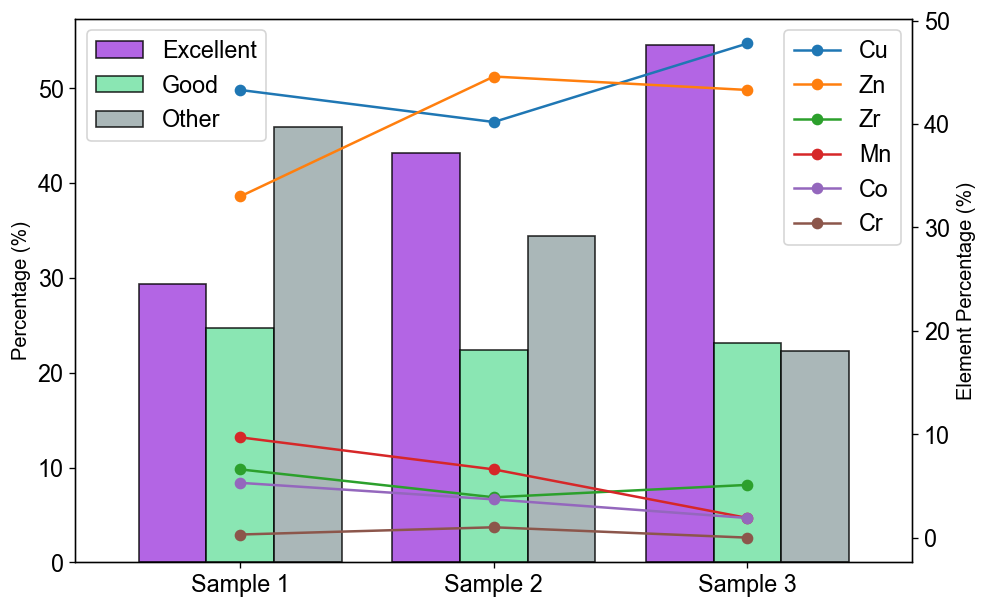

In [21]:
"""
This code creates a visualization combining bar charts and line plots to show:
1. Distribution of performance categories (Excellent, Good, Other) across different samples
2. Element composition percentages (Cu, Zn, Zr, Mn, Co, Cr) for each sample
The plot helps analyze relationships between material composition and performance.
"""

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from matplotlib import rcParams

# Set global plotting parameters
rcParams['font.family'] = 'serif'
rcParams['font.serif'] = ['Arial']
plt.rcParams['figure.figsize'] = (9, 6)
plt.rcParams['figure.dpi'] = 120
plt.rcParams.update({'font.size': 14})

# Create sample data
data = {
    'Sample': ['Sample 1', 'Sample 2', 'Sample 3'],
    'Excellent': [29.4, 43.2, 54.6],
    'Good': [24.7, 22.4, 23.1],
    'Zr': [6.6, 3.9, 5.1],
    'Cu': [43.3, 40.2, 47.8],
    'Zn': [33.0, 44.6, 43.3],
    'Mn': [9.7, 6.6, 1.9],
    'Co': [5.3, 3.7, 1.9],
    'Cr': [0.3, 1.0, 0],
    'B': [0.3, 0, 0]
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Calculate "Other" category percentage
df['Other'] = 100 - df['Excellent'] - df['Good']

# Create figure
plt.figure(figsize=(24, 16), dpi=120)

# Plot stacked bars
ax = df[['Excellent', 'Good', 'Other']].plot(kind='bar', width=0.8, 
                                            color=['#A03EDE', '#6DE0A0', '#95a5a6'],
                                            position=0.5, edgecolor='black', alpha=0.8)

# Add line plots on secondary axis
ax2 = ax.twinx()
df[['Cu', 'Zn', 'Zr', 'Mn', 'Co', 'Cr']].plot(marker='o', ax=ax2)

# Set labels
ax.set_ylabel('Percentage (%)', fontsize=12)
ax2.set_ylabel('Element Percentage (%)', fontsize=12)
ax.set_xticklabels(df['Sample'], rotation=0)

# Add legends
ax.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()


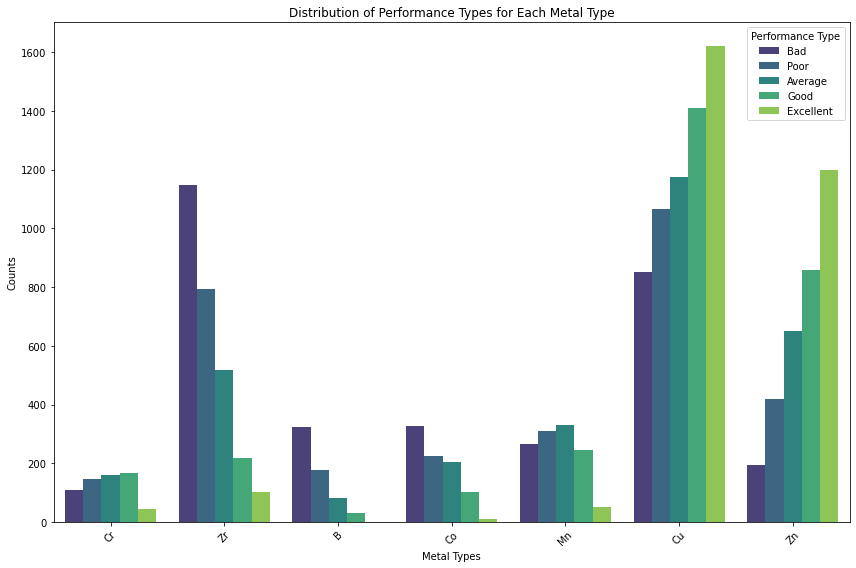

In [1]:
# This script analyzes the performance statistics of various metal nodes used in Metal-Organic Frameworks (MOFs) and visualizes the distribution of performance types for each metal type.

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Data about metal nodes and their corresponding metal types
node_to_metal = {
    'sym_12_mc_11': 'Zr', 'sym_16_mc_14': 'Zr', 'sym_8_mc_9': 'Zr', 'sym_9_mc_5': 'Zr',
    'sym_4_mc_1': 'Zn', 'sym_6_mc_3': 'Zn', 'sym_8_mc_8': 'Mn', 'sym_24_mc_13': 'Cu',
    'sym_3_mc_0': 'Cu', 'sym_5_mc_2': 'Cu', 'sym_7_mc_4': 'Cr', 'sym_8_mc_7': 'Co',
    'sym_13_mc_12': 'B', 'sym_16_mc_6': 'B', 'sym_10_mc_10': 'Zr'
}

# Prepare dictionary to record metal performance statistics
metal_performance_count = {}

folder_path = r'path/to/your/data/13515.csv'  # Updated to a more generic path
all_files = [1]
# Iterate through each results file
for filename in all_files:
    df = pd.read_csv(folder_path)
    df.columns = ['Column1', 'Column2', 'Node1', 'Node2', 'OrganicEdge', 'Column6', '', 'Column8', 'Column9', 'Column10', 'Column11', 'Column12', 'Column13', 'Column14', 'Column15', 'Performance']
    # Traverse each row
    for _, row in df.iterrows():
        nodes = [row['Node1'], row['Node2']]
        performance = row['Performance']
        
        # Record only rows containing metal nodes
        for node in nodes:
            if isinstance(node, str) and 'mc' in node:  # Check if node is a string and contains 'mc'
                metal = node_to_metal.get(node)
                if metal:
                    if metal not in metal_performance_count:
                        metal_performance_count[metal] = {}
                    
                    if performance not in metal_performance_count[metal]:
                        metal_performance_count[metal][performance] = 0
                    metal_performance_count[metal][performance] += 1

# Convert the performance statistics into a DataFrame for visualization
performance_df = pd.DataFrame(metal_performance_count).fillna(0)

# Adding 'Performance Type' column
performance_types = ['Bad', 'Poor', 'Average', 'Good', 'Excellent']
performance_df.insert(0, 'Performance Type', performance_types)

# Melt the DataFrame to prepare it for seaborn plotting
performance_df_melted = performance_df.melt(id_vars=['Performance Type'], var_name='Metal', value_name='Counts')

# Plotting
plt.figure(figsize=(12, 8))
sns.barplot(data=performance_df_melted, x='Metal', y='Counts', hue='Performance Type', palette='viridis')
plt.title('Distribution of Performance Types for Each Metal Type')
plt.xlabel('Metal Types')
plt.ylabel('Counts')
plt.xticks(rotation=45)
plt.legend(title='Performance Type')
plt.tight_layout()
plt.show()


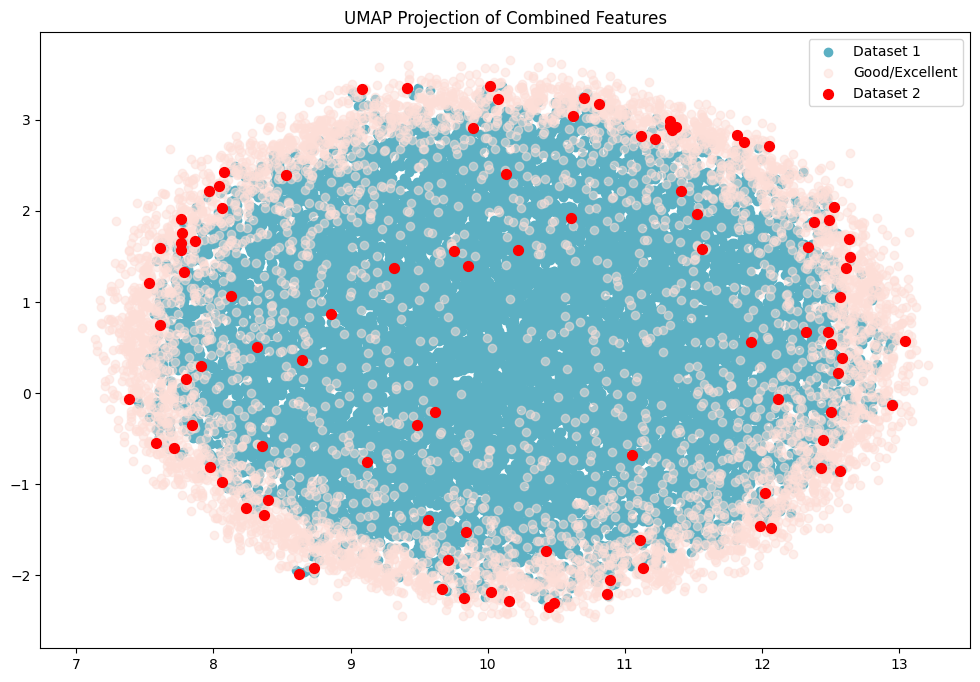

In [50]:
"""
This code performs UMAP dimensionality reduction and visualization of MOF (Metal-Organic Framework) structures.
It compares two datasets - a training dataset and a design dataset, with special highlighting of high-performing MOFs.
The visualization helps understand the distribution of MOF structures in a 2D space and identify patterns between 
different performance levels.
"""

import pandas as pd
import numpy as np
from gensim.models import Word2Vec
import umap.umap_ as umap
import matplotlib.pyplot as plt

# Read CSV files
df = pd.read_csv('data/13515.csv')
df2 = pd.read_csv('data/design_results.csv')

# Rename columns in df2 to match df
df2.rename(columns={
    'node1': 'node 1', 
    'node2': 'node 2',
    'organic_edge': 'edge',
    'col6': 'topo',
    'col8': 'UG_five_level'
}, inplace=True)

# Create combined feature string
df['combined'] = df[['node 1', 'node 2', 'edge', 'topo', 'UG_five_level']].apply(lambda x: '_'.join(x.map(str)), axis=1)
df2['combined'] = df2[['node 1', 'node 2', 'edge', 'topo', 'UG_five_level']].apply(lambda x: '_'.join(x.map(str)), axis=1)

# Train Word2Vec model on unique identifiers
all_identifiers = np.concatenate([df['combined'].values, df2['combined'].values])
all_identifiers = list(set(all_identifiers))
model = Word2Vec([all_identifiers], vector_size=50, window=5, min_count=1, workers=4)

# Convert text identifiers to embeddings
df['embedding'] = df['combined'].apply(lambda x: model.wv[x])
df2['embedding'] = df2['combined'].apply(lambda x: model.wv[x])

# Stack embeddings and perform UMAP
embedding_matrix = np.vstack(df['embedding'].values.tolist() + df2['embedding'].values.tolist())
reducer = umap.UMAP(random_state=42)
embedding = reducer.fit_transform(embedding_matrix)

# Visualization
plt.figure(figsize=(12, 8))
plt.scatter(embedding[:len(df), 0], embedding[:len(df), 1], c='#5CB0C3', label='Training Data')

# Filter and plot high-performing MOFs
high_performance_mask = (df['UG_five_level'].isin(['Good', 'Excellent']))
high_performance_embedding = reducer.transform(df[high_performance_mask]['embedding'].values.tolist())
plt.scatter(high_performance_embedding[:, 0], high_performance_embedding[:, 1], 
           c='#FDDED7', alpha=0.5, label='High Performance')
plt.scatter(embedding[len(df):, 0], embedding[len(df):, 1], 
           c='red', s=50, marker='o', label='Design Results')

plt.title('UMAP Projection of Combined MOF Features')
plt.legend()
plt.show()

In [ ]:
# AiZynthFinder
from aizynthfinder.interfaces import AiZynthApp
app = AiZynthApp(r"C:\Users\Gatsby\Desktop\scscore-master\config_local.yml")

In [ ]:
# SAScore
import pandas as pd
from rdkit import Chem
from rdkit.Chem import Descriptors

# 读取design results数据
df = pd.read_csv('./data/design_results.csv')

# 计算SAScore分数
def calculate_scores(smiles):
    try:
        # 计算SAScore
        mol = Chem.MolFromSmiles(smiles)
        sa_score = Descriptors.sa_score(mol)
        
        return sa_score
    except:
        return None

# 对每个配体计算分数
df[['SAScore']] = df['smiles'].apply(lambda x: pd.Series(calculate_scores(x)))

# 保存结果
df.to_csv('./results/synthesis_scores.csv', index=False)


In [ ]:
"""
This script performs data normalization on SCScores from design results.
It reads SCScore columns from a CSV file, normalizes them using MinMaxScaler,
calculates their sum, and saves the results to a new CSV file for composability analysis.
"""

import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Read CSV file
df = pd.read_csv('./data/design_results.csv')

# Select columns for normalization
columns_to_normalize = ['SCScore_1024', 'SCScore_2048', 'SCScore_1024uint8']

# Initialize scaler and normalize selected columns
scaler = MinMaxScaler()
df[columns_to_normalize] = scaler.fit_transform(df[columns_to_normalize])

# Calculate sum of normalized scores
df['Normalized_Sum'] = df[columns_to_normalize].sum(axis=1)

# Save results
df.to_csv('./results/composability_analysis.csv', index=False)